In [1]:
import pandas as pd

df = pd.read_csv('/home/hjoaquim/Documents/applied-ai/ws01/data/kc_house_data.zip')

df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [2]:
# 1. (a)

columns = df.columns.tolist()
n_columns = len(columns)
n_columns

# number of columns is 19 - disregarding the first column (id) and the last column (price)

21

In [3]:
# 1. (b)

n_rows = df.shape[0]
n_rows

# number of rows is 21613

21613

In [4]:
# 1. (c)

columns_w_missing_values = []

for column in columns:
    if df[column].isnull().any():
        columns_w_missing_values.append(column)

columns_w_missing_values

[]

In [5]:
# 2. 

df = df.drop(columns=['date', 'id'])

sqft_columns = [col for col in columns if 'sqft' in col]

# create a new column with the total area of the house
df['total_sqft'] = df[sqft_columns].sum(axis=1)
df['total_sqft']

0        15000
1        21711
2        22322
3        15280
4        20743
         ...  
21608     7230
21609    19463
21610     6417
21611     8285
21612     5493
Name: total_sqft, Length: 21613, dtype: int64

In [6]:
# get correlation matrix
corr_matrix = df.corr()
corr_matrix

# column with the highest correlation with price is 'sqft_living'

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,total_sqft
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447,0.118811
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244,0.053376
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175,0.120902
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286,0.225314
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557,0.953765
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269,0.004949
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703,0.030777
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575,0.089874
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406,-0.009864
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248,0.152897


In [10]:
# 3.
import numpy as np

X = df['sqft_living'].values
y = df['price'].values

mean_X = np.mean(X)
mean_y = np.mean(y)

m = np.sum((X - mean_X) * (y - mean_y)) / np.sum((X - mean_X)**2)

b = mean_y - m * mean_X

y_pred = m * X + b

print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")

Slope (m): 280.6235678974483
Intercept (b): -43580.74309447408


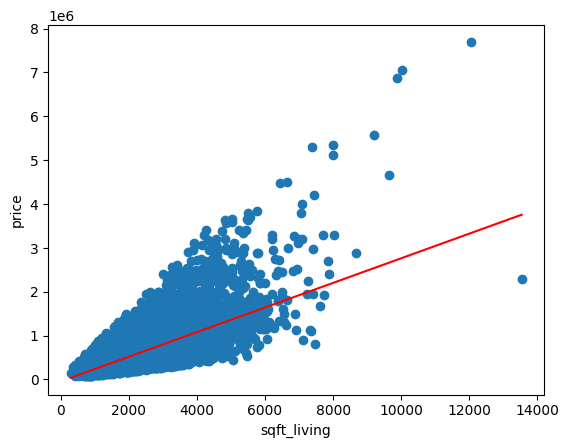

In [11]:
# 4.

import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='red')
plt.show()

In [12]:
# 5. Not really, data looks to spread out to be able to fit a linear model (at least using the choosen feature).

In [13]:
# 6. sqft_living = 2000
pred_2000 = m * 2000 + b
pred_2000

517666.39270042256

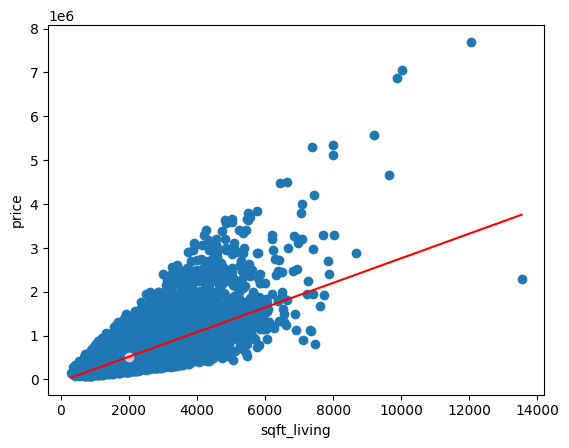

In [15]:
# plot the prediction 

plt.scatter(X, y)
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='red')
plt.scatter(2000, pred_2000, color='pink')
plt.show()

In [ ]:
# group 2

In [17]:
from sklearn.linear_model import LinearRegression

X = df['sqft_living'].values.reshape(-1, 1)
y = df['price'].values.reshape(-1, 1)

reg = LinearRegression().fit(X, y)

print(f"Slope (m): {reg.coef_[0][0]}")
print(f"Intercept (b): {reg.intercept_[0]}")

Slope (m): 280.62356789744825
Intercept (b): -43580.74309447396


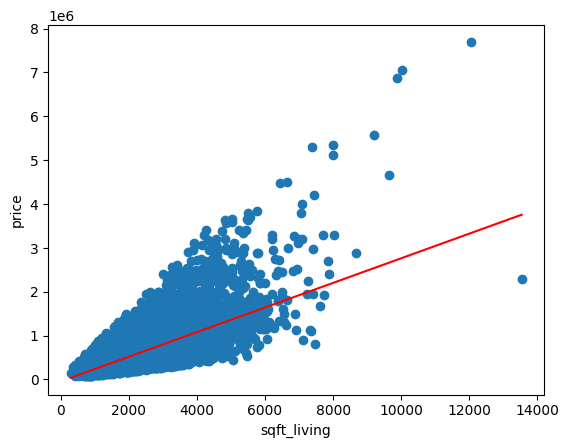

In [18]:
# plot the prediction

plt.scatter(X, y)
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.plot([min(X), max(X)], [min(reg.predict(X)), max(reg.predict(X))], color='red')
plt.show()